In [1]:
import pandas as pd 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\\Users\\Ndiaye\\Documents\\2_MASTER_2\\1e_SEMESTRE_M2\\Streamlit\\OpenData\\DATA\\commune_500.csv', encoding='latin1')
df.head()

objectid                        id                         nom  \
0         1  COMMUNE_0000000009760754            Lourties-Monbrun   
1         2  COMMUNE_0000000009756744         Boudy-de-Beauregard   
2         3  COMMUNE_0000000009754403  Autrans-Méaudre en Vercors   
3         4  COMMUNE_0000000009760252               Armous-et-Cau   
4         5  COMMUNE_0000000009727903                    Willeman   

                        nom_m insee_com          statut  population insee_can  \
0            LOURTIES-MONBRUN     32216  Commune simple       162.0        03   
1         BOUDY-DE-BEAUREGARD     47033  Commune simple       402.0        10   
2  AUTRANS-MEAUDRE EN VERCORS     38225  Commune simple      3075.0        07   
3               ARMOUS-ET-CAU     32009  Commune simple        93.0        16   
4                    WILLEMAN     62890  Commune simple       182.0        06   

   insee_arr insee_dep  insee_reg siren_epci  gdb_geomattr_data  \
0        3.0        32       76.0  200072320                NaN   
1        3.0        47       75.0  200036523                NaN   
2        1.0        38       84.0  243801024                NaN   
3        3.0        32       76.0  243200425                NaN   
4        4.0        62       32.0  200044030                NaN   

                                               shape  
0  01030000206A080000010000002900000080999999E9A6...  
1  01030000206A080000010000002C000000809999999B73...  
2  01030000206A0800000100000067000000403333330C60...  
3  01030000206A080000010000002E000000000000009EFB...  
4  01030000206A0800000100000031000000000000008096...

# Étape 1 : Filtrage des communes du Gard et de l’Hérault

In [4]:
import geopandas as gpd
# Filtrer pour le Gard (30) et l’Hérault (34)
df_filtrer = df[df["insee_dep"].isin(["30", "34"])]


In [5]:
df_filtrer.head()

objectid                        id               nom             nom_m  \
58         58  COMMUNE_0000000009757626       Le Martinet       LE MARTINET   
195       188  COMMUNE_0000000009760641            Margon            MARGON   
205       199  COMMUNE_0000000009760913       Cassagnoles       CASSAGNOLES   
230       223  COMMUNE_0000000009760389             Riols             RIOLS   
238       233  COMMUNE_0000000009758785  Campestre-et-Luc  CAMPESTRE-ET-LUC   

    insee_com          statut  population insee_can  insee_arr insee_dep  \
58      30159  Commune simple       759.0        18        1.0        30   
195     34149  Commune simple       736.0        05        1.0        34   
205     34054  Commune simple       110.0        24        1.0        34   
230     34229  Commune simple       721.0        24        1.0        34   
238     30064  Commune simple       145.0        22        3.0        30   

     insee_reg siren_epci  gdb_geomattr_data  \
58        76.0  200066918                NaN   
195       76.0  200071058                NaN   
205       76.0  200066348                NaN   
230       76.0  200066348                NaN   
238       76.0  243000270                NaN   

                                                 shape  
58   01030000206A080000010000003400000080999999ECF0...  
195  01030000206A0800000100000015000000C0CCCCCC8D16...  
205  01030000206A080000010000003A00000080999999F049...  
230  01030000206A0800000100000052000000000000007EDA...  
238  01030000206A080000010000004400000000000000567E...

# Etape2 :  Nettoyage des colonnes inutiles et correction des formats de colonnes(changement des type)

In [6]:
# seulement les colonnes utiles
colonnes_utilies = ['insee_com','nom', 'insee_dep', 'insee_reg', 'siren_epci', 'population', 'shape']
df_clean = df_filtrer[colonnes_utilies].copy()

# Conversion  des colonnes en entiers(int)
df_clean['population'] = df_clean['population'].astype(int)
df_clean['insee_dep'] = df_clean['insee_dep'].astype(int)
df_clean['insee_reg'] = df_clean['insee_reg'].astype(int)


# Etape 3 :  Conversion de la colonne shape en géométries

In [7]:
from shapely.wkb import loads
import geopandas as gpd

# Conversion de la colonne 'shape' en géométries
df_clean['geometry'] = df_clean['shape'].apply(lambda x: loads(x, hex=True))

# GeoDataFrame
gdf_clean = gpd.GeoDataFrame(df_clean, geometry='geometry', crs="EPSG:4326")

# Suppression de la colonne 'shape' (plus necessaire)
# gdf_clean = gdf_clean.drop(columns=['shape'])
gdf_clean.head()

insee_com               nom  insee_dep  insee_reg siren_epci  population  \
58      30159       Le Martinet         30         76  200066918         759   
195     34149            Margon         34         76  200071058         736   
205     34054       Cassagnoles         34         76  200066348         110   
230     34229             Riols         34         76  200066348         721   
238     30064  Campestre-et-Luc         30         76  243000270         145   

                                                 shape  \
58   01030000206A080000010000003400000080999999ECF0...   
195  01030000206A0800000100000015000000C0CCCCCC8D16...   
205  01030000206A080000010000003A00000080999999F049...   
230  01030000206A0800000100000052000000000000007EDA...   
238  01030000206A080000010000004400000000000000567E...   

                                              geometry  
58   POLYGON ((784502.3 6350275.5, 784512 6350284.5...  
195  POLYGON ((723782.9 6264082.3, 723855.2 6264189...  
205  POLYGON ((664824.3 6258276.2, 664947.3 6258359...  
230  POLYGON ((683327 6272556, 683349.3 6272512.4, ...  
238  POLYGON ((737067 6314108.9, 737085.7 6314091.2...

In [8]:
# pip install openpyxl

In [33]:
#gdf_clean.to_file("../DATA/communes_30_34_clean.geojson", driver="GeoJSON")
# gdf_clean.drop(columns=['geometry']).to_excel("../DATA/communes_30_34_clean.xlsx", index=False) #pour export en xlsx 


In [32]:
gdf_clean

insee_com                                  nom  insee_dep  insee_reg  \
58        30159                          Le Martinet         30         76   
195       34149                               Margon         34         76   
205       34054                          Cassagnoles         34         76   
230       34229                                Riols         34         76   
238       30064                     Campestre-et-Luc         30         76   
...         ...                                  ...        ...        ...   
34563     30106  Durfort-et-Saint-Martin-de-Sossenac         30         76   
34602     30127                               Gaujac         30         76   
34631     34105                            Fouzilhon         34         76   
34664     34235                                Rosis         34         76   
34764     30252             Saint-Félix-de-Pallières         30         76   

      siren_epci  population  \
58     200066918         759   
195    200071058         736   
205    200066348         110   
230    200066348         721   
238    243000270         145   
...          ...         ...   
34563  200034411         753   
34602  200034692        1065   
34631  200071058         249   
34664  200066553         264   
34764  200034411         207   

                                                   shape  \
58     01030000206A080000010000003400000080999999ECF0...   
195    01030000206A0800000100000015000000C0CCCCCC8D16...   
205    01030000206A080000010000003A00000080999999F049...   
230    01030000206A0800000100000052000000000000007EDA...   
238    01030000206A080000010000004400000000000000567E...   
...                                                  ...   
34563  01030000206A0800000100000039000000403333338CA2...   
34602  01030000206A080000010000002400000080999999AC2C...   
34631  01030000206A0800000100000015000000000000003100...   
34664  01030000206A080000010000007A00000040333333C752...   
34764  01030000206A080000010000003500000080666666F786...   

                                                geometry  
58     POLYGON ((784502.3 6350275.5, 784512 6350284.5...  
195    POLYGON ((723782.9 6264082.3, 723855.2 6264189...  
205    POLYGON ((664824.3 6258276.2, 664947.3 6258359...  
230    POLYGON ((683327 6272556, 683349.3 6272512.4, ...  
238    POLYGON ((737067 6314108.9, 737085.7 6314091.2...  
...                                                  ...  
34563  POLYGON ((774470.1 6318687.1, 774462 6318706.8...  
34602  POLYGON ((824918.3 6330271.6, 824654.3 6330433...  
34631  POLYGON ((720920.5 6266250, 720768.4 6266263.5...  
34664  POLYGON ((698723.6 6277267.5, 698679.4 6277258...  
34764  POLYGON ((770939.7 6324763, 771000.2 6324822.5...  

[692 rows x 8 columns]

# Etape 4 : Chargement et filtre les données CC Logement

In [10]:
df_cc_logement= pd.read_csv("C:\\Users\\Ndiaye\\Documents\\2_MASTER_2\\1e_SEMESTRE_M2\\Streamlit\\OpenData\\SORTIE\\Compil_clean.csv")
df_cc_logement.head()


CODGEO         LIBGEO  DEP          LOG           RP      RSECOCC  \
0   30001      Aigaliers   30   350.745416   229.895704    89.912186   
1   30002      Aigremont   30   414.761075   327.900205    77.663837   
2   30003  Aigues-Mortes   30  5376.776608  3983.513458  1084.436653   
3   30004   Aigues-Vives   30  1628.669871  1417.886360    90.191022   
4   30005        Aiguèze   30   250.965647   110.032157   113.718747   

       LOGVAC       MAISON       APPART      RP_1P  ...   RP_LOCPRIV  Plog_RP  \
0   30.937526   329.380299    19.413995   4.875347  ...    30.213457     65.5   
1    9.197033   390.869741    20.817543   4.165367  ...    53.421945     79.1   
2  308.826498  3810.180887  1527.882255  73.796932  ...  1032.117277     74.1   
3  120.592489  1424.993904   197.521667  24.947336  ...   293.631063     87.1   
4   27.214743   188.938835    54.307282   0.000000  ...    25.116791     43.8   

   Plog_RP_LOCPRIV  Plog_RP_LOC  Plog_RP_PROP  Plog_RP_GRAT  Prp_RP_LOCPRIV  \
0             65.5          8.6          52.8           4.2           100.0   
1             79.1         12.9          64.7           1.5           100.0   
2             66.7         26.6          45.0           2.5            90.0   
3             84.3         20.8          64.4           1.9            96.8   
4             43.8         10.0          31.5           2.4           100.0   

   Prp_RP_LOC  Prp_RP_PROP  Prp_RP_GRAT  
0        13.1         80.5          6.3  
1        16.3         81.8          1.9  
2        35.9         60.8          3.3  
3        23.9         73.9          2.1  
4        22.8         71.8          5.4  

[5 rows x 51 columns]

In [11]:
df_cc_logement

CODGEO           LIBGEO  DEP           LOG           RP       RSECOCC  \
0      30001        Aigaliers   30    350.745416   229.895704     89.912186   
1      30002        Aigremont   30    414.761075   327.900205     77.663837   
2      30003    Aigues-Mortes   30   5376.776608  3983.513458   1084.436653   
3      30004     Aigues-Vives   30   1628.669871  1417.886360     90.191022   
4      30005          Aiguèze   30    250.965647   110.032157    113.718747   
...      ...              ...  ...           ...          ...           ...   
6926   34340       Villetelle   34    556.128635   526.812845     19.206897   
6927   34341      Villeveyrac   34   1615.474093  1413.000000     66.113990   
6928   34342   Viols-en-Laval   34    101.190476    87.857143      7.777778   
6929   34343    Viols-le-Fort   34    539.000000   488.000000     16.000000   
6930   34344  La Grande-Motte   34  20385.951766  4808.000000  15027.241521   

          LOGVAC       MAISON        APPART       RP_1P  ...   RP_LOCPRIV  \
0      30.937526   329.380299     19.413995    4.875347  ...    30.213457   
1       9.197033   390.869741     20.817543    4.165367  ...    53.421945   
2     308.826498  3810.180887   1527.882255   73.796932  ...  1032.117277   
3     120.592489  1424.993904    197.521667   24.947336  ...   293.631063   
4      27.214743   188.938835     54.307282    0.000000  ...    25.116791   
...          ...          ...           ...         ...  ...          ...   
6926   10.108893   522.011231     32.110497    2.006906  ...    99.341851   
6927  136.360104  1489.783344    118.507599    6.146641  ...   325.269999   
6928    5.555556    77.862616     23.327860    0.000000  ...    29.285714   
6929   35.000000   442.000000     72.000000   10.000000  ...   138.000000   
6930  550.710245  1786.982411  18549.547852  906.317067  ...  1453.570188   

      Plog_RP  Plog_RP_LOCPRIV  Plog_RP_LOC  Plog_RP_PROP  Plog_RP_GRAT  \
0        65.5             65.5          8.6          52.8           4.2   
1        79.1             79.1         12.9          64.7           1.5   
2        74.1             66.7         26.6          45.0           2.5   
3        87.1             84.3         20.8          64.4           1.9   
4        43.8             43.8         10.0          31.5           2.4   
...       ...              ...          ...           ...           ...   
6926     94.7             94.7         17.9          75.2           1.6   
6927     87.5             87.0         20.6          63.9           3.0   
6928     86.8             86.8         28.9          54.9           3.0   
6929     90.5             85.0         31.2          55.7           3.7   
6930     23.6             22.5          8.2          14.2           1.1   

      Prp_RP_LOCPRIV  Prp_RP_LOC  Prp_RP_PROP  Prp_RP_GRAT  
0              100.0        13.1         80.5          6.3  
1              100.0        16.3         81.8          1.9  
2               90.0        35.9         60.8          3.3  
3               96.8        23.9         73.9          2.1  
4              100.0        22.8         71.8          5.4  
...              ...         ...          ...          ...  
6926           100.0        18.9         79.4          1.7  
6927            99.5        23.5         73.0          3.4  
6928           100.0        33.3         63.2          3.4  
6929            93.9        34.4         61.5          4.1  
6930            95.5        34.7         60.4          4.9  

[6931 rows x 51 columns]

In [12]:
# Filtre pour l'année 2022
df_cc_2022 = df_cc_logement[df_cc_logement['AN'] == 2022]
df_cc_2022.head()

CODGEO         LIBGEO  DEP          LOG           RP      RSECOCC  \
0   30001      Aigaliers   30   350.745416   229.895704    89.912186   
1   30002      Aigremont   30   414.761075   327.900205    77.663837   
2   30003  Aigues-Mortes   30  5376.776608  3983.513458  1084.436653   
3   30004   Aigues-Vives   30  1628.669871  1417.886360    90.191022   
4   30005        Aiguèze   30   250.965647   110.032157   113.718747   

       LOGVAC       MAISON       APPART      RP_1P  ...   RP_LOCPRIV  Plog_RP  \
0   30.937526   329.380299    19.413995   4.875347  ...    30.213457     65.5   
1    9.197033   390.869741    20.817543   4.165367  ...    53.421945     79.1   
2  308.826498  3810.180887  1527.882255  73.796932  ...  1032.117277     74.1   
3  120.592489  1424.993904   197.521667  24.947336  ...   293.631063     87.1   
4   27.214743   188.938835    54.307282   0.000000  ...    25.116791     43.8   

   Plog_RP_LOCPRIV  Plog_RP_LOC  Plog_RP_PROP  Plog_RP_GRAT  Prp_RP_LOCPRIV  \
0             65.5          8.6          52.8           4.2           100.0   
1             79.1         12.9          64.7           1.5           100.0   
2             66.7         26.6          45.0           2.5            90.0   
3             84.3         20.8          64.4           1.9            96.8   
4             43.8         10.0          31.5           2.4           100.0   

   Prp_RP_LOC  Prp_RP_PROP  Prp_RP_GRAT  
0        13.1         80.5          6.3  
1        16.3         81.8          1.9  
2        35.9         60.8          3.3  
3        23.9         73.9          2.1  
4        22.8         71.8          5.4  

[5 rows x 51 columns]

In [13]:
# Renommer CODGEO en insee_com pour la jointure
df_cc_2022 = df_cc_2022.rename(columns={'CODGEO': 'insee_com'})
df_cc_2022.head()

insee_com         LIBGEO  DEP          LOG           RP      RSECOCC  \
0      30001      Aigaliers   30   350.745416   229.895704    89.912186   
1      30002      Aigremont   30   414.761075   327.900205    77.663837   
2      30003  Aigues-Mortes   30  5376.776608  3983.513458  1084.436653   
3      30004   Aigues-Vives   30  1628.669871  1417.886360    90.191022   
4      30005        Aiguèze   30   250.965647   110.032157   113.718747   

       LOGVAC       MAISON       APPART      RP_1P  ...   RP_LOCPRIV  Plog_RP  \
0   30.937526   329.380299    19.413995   4.875347  ...    30.213457     65.5   
1    9.197033   390.869741    20.817543   4.165367  ...    53.421945     79.1   
2  308.826498  3810.180887  1527.882255  73.796932  ...  1032.117277     74.1   
3  120.592489  1424.993904   197.521667  24.947336  ...   293.631063     87.1   
4   27.214743   188.938835    54.307282   0.000000  ...    25.116791     43.8   

   Plog_RP_LOCPRIV  Plog_RP_LOC  Plog_RP_PROP  Plog_RP_GRAT  Prp_RP_LOCPRIV  \
0             65.5          8.6          52.8           4.2           100.0   
1             79.1         12.9          64.7           1.5           100.0   
2             66.7         26.6          45.0           2.5            90.0   
3             84.3         20.8          64.4           1.9            96.8   
4             43.8         10.0          31.5           2.4           100.0   

   Prp_RP_LOC  Prp_RP_PROP  Prp_RP_GRAT  
0        13.1         80.5          6.3  
1        16.3         81.8          1.9  
2        35.9         60.8          3.3  
3        23.9         73.9          2.1  
4        22.8         71.8          5.4  

[5 rows x 51 columns]

# Etape 5 : Jointure avec les données géographiques

In [14]:
# Convertir 'insee_com' en str dans les deux DataFrames
gdf_clean['insee_com'] = gdf_clean['insee_com'].astype(str)
df_cc_2022['insee_com'] = df_cc_2022['insee_com'].astype(str)


In [15]:
gdf_final = gdf_clean.merge(df_cc_2022, on='insee_com', how='left')



In [16]:
gdf_final.head()

insee_com               nom  insee_dep  insee_reg siren_epci  population  \
0     30159       Le Martinet         30         76  200066918         759   
1     34149            Margon         34         76  200071058         736   
2     34054       Cassagnoles         34         76  200066348         110   
3     34229             Riols         34         76  200066348         721   
4     30064  Campestre-et-Luc         30         76  243000270         145   

                                               shape  \
0  01030000206A080000010000003400000080999999ECF0...   
1  01030000206A0800000100000015000000C0CCCCCC8D16...   
2  01030000206A080000010000003A00000080999999F049...   
3  01030000206A0800000100000052000000000000007EDA...   
4  01030000206A080000010000004400000000000000567E...   

                                            geometry            LIBGEO   DEP  \
0  POLYGON ((784502.3 6350275.5, 784512 6350284.5...       Le Martinet  30.0   
1  POLYGON ((723782.9 6264082.3, 723855.2 6264189...            Margon  34.0   
2  POLYGON ((664824.3 6258276.2, 664947.3 6258359...       Cassagnoles  34.0   
3  POLYGON ((683327 6272556, 683349.3 6272512.4, ...             Riols  34.0   
4  POLYGON ((737067 6314108.9, 737085.7 6314091.2...  Campestre-et-Luc  30.0   

   ...  RP_LOCPRIV  Plog_RP  Plog_RP_LOCPRIV  Plog_RP_LOC  Plog_RP_PROP  \
0  ...  131.072019     64.9             59.4         27.6          36.4   
1  ...   42.907514     77.2             72.2         15.6          59.7   
2  ...   12.881818     57.2             57.2         12.0          41.5   
3  ...   66.027405     54.5             54.2         10.2          42.7   
4  ...   20.552239     54.3             54.3         14.2          38.6   

   Plog_RP_GRAT  Prp_RP_LOCPRIV  Prp_RP_LOC  Prp_RP_PROP  Prp_RP_GRAT  
0           0.9            91.5        42.5         56.1          1.3  
1           1.9            93.5        20.2         77.3          2.4  
2           3.7           100.0        21.0         72.6          6.5  
3           1.7            99.4        18.7         78.2          3.0  
4           1.6           100.0        26.1         71.0          2.9  

[5 rows x 58 columns]

In [17]:
gdf_final[['nom', 'insee_com', 'RP', 'LOG']].head()


nom insee_com          RP         LOG
0       Le Martinet     30159  385.713473  594.007112
1            Margon     34149  312.411621  404.752870
2       Cassagnoles     34054   61.436364  107.436364
3             Riols     34229  363.519822  666.513124
4  Campestre-et-Luc     30064   78.783582  144.990479

In [27]:
gdf_final.to_file("../DATA/communes_30_34_with_cc_2022.geojson", driver="GeoJSON")


In [19]:
gdf_final.head()

insee_com               nom  insee_dep  insee_reg siren_epci  population  \
0     30159       Le Martinet         30         76  200066918         759   
1     34149            Margon         34         76  200071058         736   
2     34054       Cassagnoles         34         76  200066348         110   
3     34229             Riols         34         76  200066348         721   
4     30064  Campestre-et-Luc         30         76  243000270         145   

                                               shape  \
0  01030000206A080000010000003400000080999999ECF0...   
1  01030000206A0800000100000015000000C0CCCCCC8D16...   
2  01030000206A080000010000003A00000080999999F049...   
3  01030000206A0800000100000052000000000000007EDA...   
4  01030000206A080000010000004400000000000000567E...   

                                            geometry            LIBGEO   DEP  \
0  POLYGON ((784502.3 6350275.5, 784512 6350284.5...       Le Martinet  30.0   
1  POLYGON ((723782.9 6264082.3, 723855.2 6264189...            Margon  34.0   
2  POLYGON ((664824.3 6258276.2, 664947.3 6258359...       Cassagnoles  34.0   
3  POLYGON ((683327 6272556, 683349.3 6272512.4, ...             Riols  34.0   
4  POLYGON ((737067 6314108.9, 737085.7 6314091.2...  Campestre-et-Luc  30.0   

   ...  RP_LOCPRIV  Plog_RP  Plog_RP_LOCPRIV  Plog_RP_LOC  Plog_RP_PROP  \
0  ...  131.072019     64.9             59.4         27.6          36.4   
1  ...   42.907514     77.2             72.2         15.6          59.7   
2  ...   12.881818     57.2             57.2         12.0          41.5   
3  ...   66.027405     54.5             54.2         10.2          42.7   
4  ...   20.552239     54.3             54.3         14.2          38.6   

   Plog_RP_GRAT  Prp_RP_LOCPRIV  Prp_RP_LOC  Prp_RP_PROP  Prp_RP_GRAT  
0           0.9            91.5        42.5         56.1          1.3  
1           1.9            93.5        20.2         77.3          2.4  
2           3.7           100.0        21.0         72.6          6.5  
3           1.7            99.4        18.7         78.2          3.0  
4           1.6           100.0        26.1         71.0          2.9  

[5 rows x 58 columns]

In [20]:
# pip install folium

In [21]:
import geopandas as gpd
import folium

# (les coords ~700 000 / 6 300 000 => Lambert-93)
gdf_final = gdf_final.set_crs(epsg=2154, allow_override=True).to_crs(epsg=4326)

# 2) Carte centrée sur l’étendue des données
center = [gdf_final.geometry.unary_union.centroid.y, gdf_final.geometry.unary_union.centroid.x]
m = folium.Map(location=center, zoom_start=8)

# Colonnes numériques (LOG/RP peuvent venir en float/str)
for col in ["LOG", "RP"]:
    if col in gdf_final.columns:
        gdf_final[col] = pd.to_numeric(gdf_final[col], errors="coerce").fillna(0)

# Couche GeoJSON avec un style simple
folium.GeoJson(
    gdf_final,
    tooltip=folium.GeoJsonTooltip(fields=["nom", "LOG", "RP"], aliases=["Commune", "Logements", "Rés. principales"]),
    style_function=lambda feat: {
        "fillColor": "blue" if feat["properties"].get("LOG", 0) > 100 else "green",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.6,
    },
    name="Communes 30-34 (LOG/RP)"
).add_to(m)

folium.LayerControl().add_to(m)

m  # affiche dans Jupyter
# m.save("DATA/carte_communes_2022.html")
# print(" Carte sauvegardée -> DATA/carte_communes_2022.html")


C:\Users\Ndiaye\AppData\Local\Temp\ipykernel_11900\2095583873.py:8: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = [gdf_final.geometry.unary_union.centroid.y, gdf_final.geometry.unary_union.centroid.x]


In [22]:
# pip install matplotlib

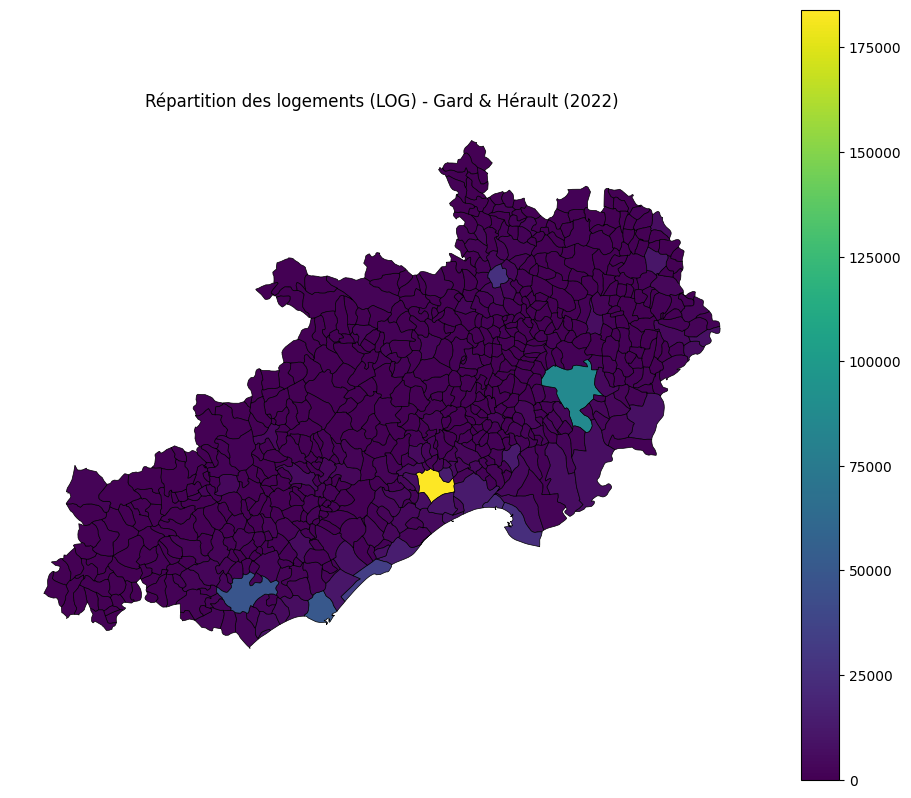

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
gdf_final.plot(ax=ax, column='LOG', cmap='viridis', legend=True,
               edgecolor='black', linewidth=0.5)
ax.set_title("Répartition des logements (LOG) - Gard & Hérault (2022)")
ax.axis('off')
plt.show()


# Interpretation de la carte
La carte montre que les logements sont surtout concentrés dans les grandes villes comme Montpellier(jaune), Nîmes et Béziers.
Les communes rurales de l’intérieur du Gard et de l’Hérault comptent beaucoup moins de logements.
On voit donc une forte concentration urbaine et une faible densité dans les zones rurales.

In [24]:
import geopandas as gpd
import folium

In [ ]:
# gdf = gpd.read_file("../DATA/communes_30_34_with_cc_2022.geojson")

In [28]:

gdf.set_crs(epsg=2154, allow_override=True).to_crs(epsg=4326)


insee_com                                  nom  insee_dep  insee_reg  \
0       30159                          Le Martinet         30         76   
1       34149                               Margon         34         76   
2       34054                          Cassagnoles         34         76   
3       34229                                Riols         34         76   
4       30064                     Campestre-et-Luc         30         76   
..        ...                                  ...        ...        ...   
687     30106  Durfort-et-Saint-Martin-de-Sossenac         30         76   
688     30127                               Gaujac         30         76   
689     34105                            Fouzilhon         34         76   
690     34235                                Rosis         34         76   
691     30252             Saint-Félix-de-Pallières         30         76   

    siren_epci  population                                              shape  \
0    200066918         759  01030000206A080000010000003400000080999999ECF0...   
1    200071058         736  01030000206A0800000100000015000000C0CCCCCC8D16...   
2    200066348         110  01030000206A080000010000003A00000080999999F049...   
3    200066348         721  01030000206A0800000100000052000000000000007EDA...   
4    243000270         145  01030000206A080000010000004400000000000000567E...   
..         ...         ...                                                ...   
687  200034411         753  01030000206A0800000100000039000000403333338CA2...   
688  200034692        1065  01030000206A080000010000002400000080999999AC2C...   
689  200071058         249  01030000206A0800000100000015000000000000003100...   
690  200066553         264  01030000206A080000010000007A00000040333333C752...   
691  200034411         207  01030000206A080000010000003500000080666666F786...   

                                  LIBGEO   DEP         LOG  ...  RP_ACH18  \
0                            Le Martinet  30.0  594.007112  ...      None   
1                                 Margon  34.0  404.752870  ...      None   
2                            Cassagnoles  34.0  107.436364  ...      None   
3                                  Riols  34.0  666.513124  ...      None   
4                       Campestre-et-Luc  30.0  144.990479  ...      None   
..                                   ...   ...         ...  ...       ...   
687  Durfort-et-Saint-Martin-de-Sossenac  30.0  540.478684  ...      None   
688                               Gaujac  30.0  602.687255  ...      None   
689                            Fouzilhon  34.0  150.000000  ...      None   
690                                Rosis  34.0  324.555740  ...      None   
691             Saint-Félix-de-Pallières  30.0  198.044882  ...      None   

     RP_ACH17  RP_ACH15  RP_ACH14  RP_ACH13  RP_ACH12  RP_ACH11  RP_ACH10  \
0        None      None      None      None      None      None      None   
1        None      None      None      None      None      None      None   
2        None      None      None      None      None      None      None   
3        None      None      None      None      None      None      None   
4        None      None      None      None      None      None      None   
..        ...       ...       ...       ...       ...       ...       ...   
687      None      None      None      None      None      None      None   
688      None      None      None      None      None      None      None   
689      None      None      None      None      None      None      None   
690      None      None      None      None      None      None      None   
691      None      None      None      None      None      None      None   

     RP_LOCPRIV                                           geometry  
0    131.072019  POLYGON ((4.05817 44.2464, 4.05829 44.24648, 4...  
1     42.907514  POLYGON ((3.29382 43.47544, 3.29472 43.4764, 3...  
2     12.881818  POLYGON ((2.56583 43.42273, 2.56734 43.42348

In [29]:
gdf.head()

insee_com               nom  insee_dep  insee_reg siren_epci  population  \
0     30159       Le Martinet         30         76  200066918         759   
1     34149            Margon         34         76  200071058         736   
2     34054       Cassagnoles         34         76  200066348         110   
3     34229             Riols         34         76  200066348         721   
4     30064  Campestre-et-Luc         30         76  243000270         145   

                                               shape            LIBGEO   DEP  \
0  01030000206A080000010000003400000080999999ECF0...       Le Martinet  30.0   
1  01030000206A0800000100000015000000C0CCCCCC8D16...            Margon  34.0   
2  01030000206A080000010000003A00000080999999F049...       Cassagnoles  34.0   
3  01030000206A0800000100000052000000000000007EDA...             Riols  34.0   
4  01030000206A080000010000004400000000000000567E...  Campestre-et-Luc  30.0   

          LOG  ...  RP_ACH18  RP_ACH17  RP_ACH15  RP_ACH14  RP_ACH13  \
0  594.007112  ...      None      None      None      None      None   
1  404.752870  ...      None      None      None      None      None   
2  107.436364  ...      None      None      None      None      None   
3  666.513124  ...      None      None      None      None      None   
4  144.990479  ...      None      None      None      None      None   

   RP_ACH12  RP_ACH11  RP_ACH10  RP_LOCPRIV  \
0      None      None      None  131.072019   
1      None      None      None   42.907514   
2      None      None      None   12.881818   
3      None      None      None   66.027405   
4      None      None      None   20.552239   

                                            geometry  
0  POLYGON ((784502.3 6350275.5, 784512 6350284.5...  
1  POLYGON ((723782.9 6264082.3, 723855.2 6264189...  
2  POLYGON ((664824.3 6258276.2, 664947.3 6258359...  
3  POLYGON ((683327 6272556, 683349.3 6272512.4, ...  
4  POLYGON ((737067 6314108.9, 737085.7 6314091.2...  

[5 rows x 49 columns]